In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
x = torch.linspace(0,100,1000, dtype=torch.float32)
y = torch.sin(x)

In [69]:
input_len = 5
model = nn.RNN(input_size=input_len, hidden_size=1, num_layers=1)


In [73]:
epochs = 10
hn = torch.zeros(1,1)
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-3)

for i in range(epochs):
    for j in range(len(x) - input_len ):
        inp = torch.sin( x[j:j+ input_len].unsqueeze(dim=0))
        
        output, _ = model.forward(inp, hn)

        loss = criterion.forward(output ,y[j+input_len].unsqueeze(dim=0).unsqueeze(dim=0) )

        optim.zero_grad()
        
        loss.backward()

        optim.step()
        hn = hn.detach()
    print(loss)


tensor(0.0304, grad_fn=<MseLossBackward0>)
tensor(0.0282, grad_fn=<MseLossBackward0>)
tensor(0.0263, grad_fn=<MseLossBackward0>)
tensor(0.0246, grad_fn=<MseLossBackward0>)
tensor(0.0231, grad_fn=<MseLossBackward0>)
tensor(0.0217, grad_fn=<MseLossBackward0>)
tensor(0.0205, grad_fn=<MseLossBackward0>)
tensor(0.0194, grad_fn=<MseLossBackward0>)
tensor(0.0184, grad_fn=<MseLossBackward0>)
tensor(0.0176, grad_fn=<MseLossBackward0>)


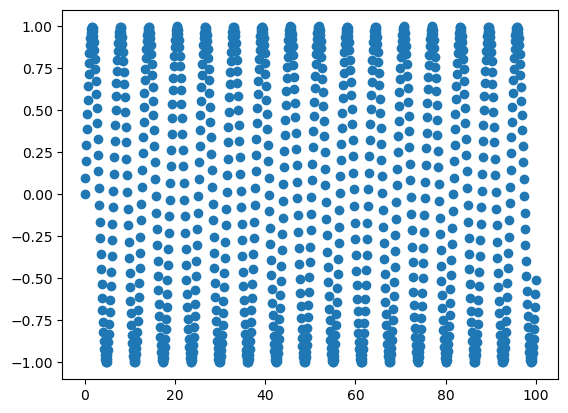

In [57]:
plt.scatter(x,y)

In [74]:
x1 = torch.linspace(100,120,50)
lst_res = []
for i in range(len(x1)-input_len):
    output, _ = model.forward(torch.sin(x1[i:i+input_len].unsqueeze(dim=0)), hn)
    lst_res.append(output)

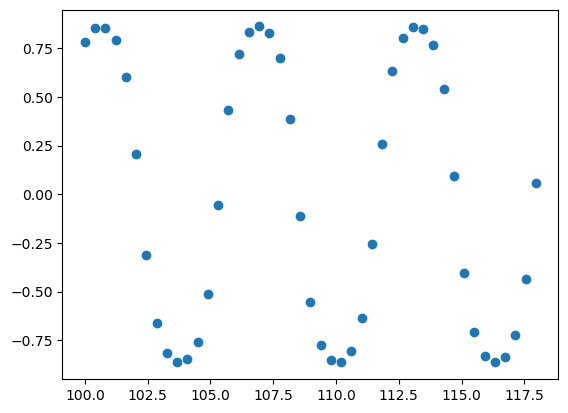

In [78]:
plt.scatter(x1[:-5].numpy(), [i[0].detach().numpy() for i in lst_res])